## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Import necessary files 

import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [163]:
st_df = pd.read_csv("students-data.csv", delimiter=";")

In [164]:
st_df.shape

(395, 33)

In [165]:
st_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [162]:
st_df.dtypes


school        int32
sex           int32
age           int64
address       int32
famsize       int32
Pstatus       int32
Medu          int64
Fedu          int64
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
goout         int64
Walc          int64
health        int64
absences      int64
G1            int32
G2            int32
G3            int32
dtype: object

In [7]:
st_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [166]:
st_df.index.name = "number"

In [167]:
st_df.index.name

'number'

In [168]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [169]:
st_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [0]:
#Conclusion - There are no missing values in the dataset.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
st_df.select_dtypes(include="object").dtypes

school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [6]:
st_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [170]:
#As we have columns - 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc' with variance less than 1 ,
#we would drop these columns 

st_df.drop(["traveltime", "studytime", "failures", "famrel", "freetime", "Dalc"], axis=1, inplace=True)

In [171]:
st_df.shape
#st_df.dtypes

(395, 27)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [172]:
num = LabelEncoder()
st_df['school'] = num.fit_transform(st_df['school'].astype("str"))
st_df['sex'] = num.fit_transform(st_df['sex'].astype("str"))
st_df['address'] = num.fit_transform(st_df['address'].astype("str"))
st_df['famsize'] = num.fit_transform(st_df['famsize'].astype("str"))
st_df['Pstatus'] = num.fit_transform(st_df['Pstatus'].astype("str"))
st_df['Mjob'] = num.fit_transform(st_df['Mjob'].astype("str"))
st_df['Fjob'] = num.fit_transform(st_df['Fjob'].astype("str"))
st_df['reason'] = num.fit_transform(st_df['reason'].astype("str"))
st_df['guardian'] = num.fit_transform(st_df['guardian'].astype("str"))
st_df['schoolsup'] = num.fit_transform(st_df['schoolsup'].astype("str"))
st_df['famsup'] = num.fit_transform(st_df['famsup'].astype("str"))
st_df['paid'] = num.fit_transform(st_df['paid'].astype("str"))
st_df['activities'] = num.fit_transform(st_df['activities'].astype("str"))
st_df['nursery'] = num.fit_transform(st_df['nursery'].astype("str"))
st_df['higher'] = num.fit_transform(st_df['higher'].astype("str"))
st_df['internet'] = num.fit_transform(st_df['internet'].astype("str"))
st_df['romantic'] = num.fit_transform(st_df['romantic'].astype("str"))

In [173]:
st_df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [174]:
st_df['G1'] = np.where(st_df['G1']>=10, 1, 0)

In [175]:
st_df['G2'] = np.where(st_df['G2']>=10, 1, 0)
st_df['G3'] = np.where(st_df['G3']>=10, 1, 0)

In [176]:
st_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [177]:
X = st_df.drop(columns='G3')

In [178]:
y= st_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

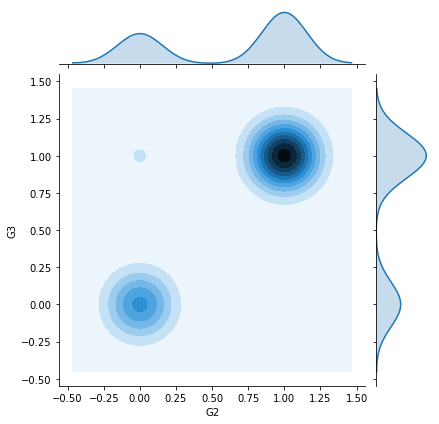

In [18]:
sns.jointplot("G2", "G3", data=st_df, kind='kde')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

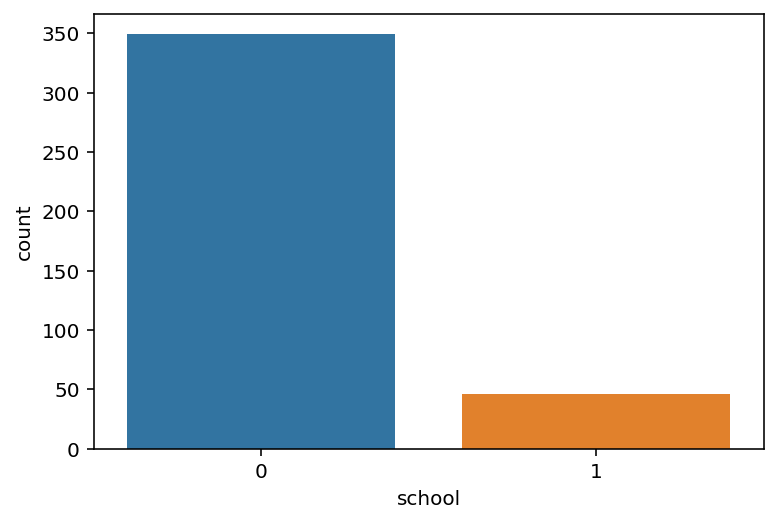

In [14]:
#Number of students in each school
#Count Plot
#st_df["school"].groupby(st_df["school"]).count()
sns.countplot(x='school', data=st_df)


In [ ]:
#In the above graph, 0 - GP school and 1- HP school.
#This dataset contains more students of GP school and less students of HP school.

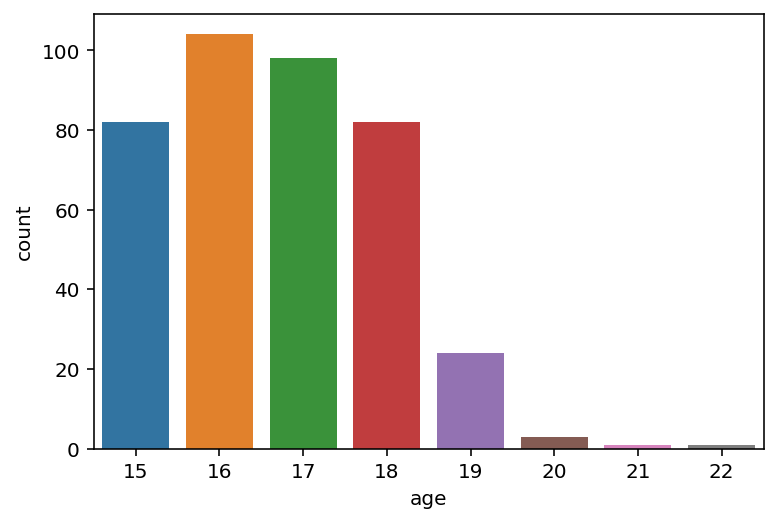

In [15]:
#Number of Students with different ages
sns.countplot(x='age', data=st_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=95, random_state=0)

In [204]:
X_train.shape

(300, 26)

In [205]:
y_train.shape

(300,)

In [206]:
X_test.shape

(95, 26)

In [207]:
y_test.shape

(95,)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [208]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [209]:
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Training Accuracy : ", train_accuracy)
print("Test Accuracy : ", test_accuracy)

Training Accuracy :  0.92
Test Accuracy :  0.9263157894736842


In [210]:
train_f1score = f1_score(y_train_pred, y_train)
test_f1score = f1_score(y_test_pred, y_test)
print("Training f1 score : ", train_f1score)
print("Test f1 score : ", test_f1score)

Training f1 score :  0.9405940594059405
Test f1 score :  0.9391304347826087


# Naive bayes with Iris data

### Import Iris.csv

In [52]:
iris = pd.read_csv("iris.csv")

In [53]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
iris.shape

(152, 6)

In [55]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [56]:
iris[iris.isna().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [45]:
# As we have null values , in this dataset, we would replace the same with the Median of that column 
#for further processing the data.

In [57]:
iris["SepalLengthCm"]= iris["SepalLengthCm"].replace(np.nan,iris["SepalLengthCm"].median())
iris["SepalWidthCm"]= iris["SepalWidthCm"].replace(np.nan,iris["SepalWidthCm"].median())
iris["PetalLengthCm"]= iris["PetalLengthCm"].replace(np.nan,iris["PetalLengthCm"].median())
iris["PetalWidthCm"]= iris["PetalWidthCm"].replace(np.nan,iris["PetalWidthCm"].median())

In [58]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [62]:
X = iris.drop("Species", axis=1)

In [63]:
y = iris["Species"]

### Find the distribution of target variable (Class)

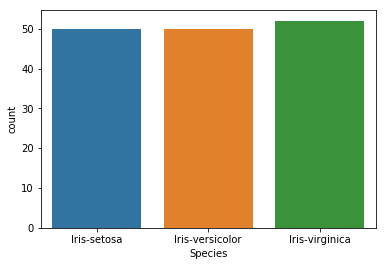

In [50]:
sns.countplot(x='Species', data=iris)

### Plot the distribution of target variable using histogram

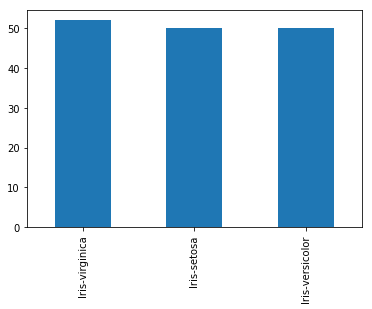

In [72]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

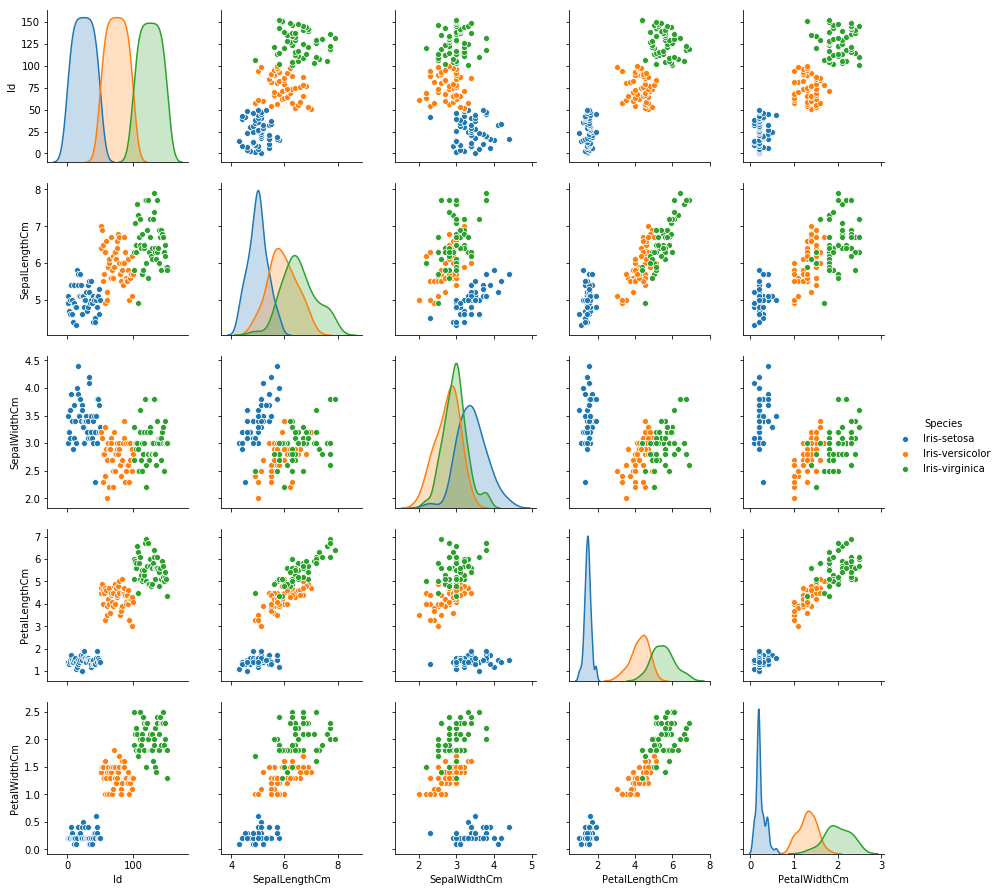

In [75]:
#We can use scatter matrix or pairplot(a type of scatter matrix) to show the distribution of variables.
#Here, we use Pairplot as it had the facility to add "Hue" feature to show better co-relation between variables.

#pd.plotting.scatter_matrix(iris,figsize=(10,10));
sns.pairplot(iris, hue="Species")

In [0]:
#Insights :
#- From looking at the above graph, we can say there is strong co-relation between the variables.Especially, between Petal Length and Petal Width.
#- PetalLength and PetalWidth for Species- Iris Setosa is small compared to other species
#- SepalWidth across species looks somewhat normally distributed
#- There is more co-relation between SepalLength and Petal Length,PetalWidth than Sepal Width and others.

### Summary Statistics and explain insights for at least 2 variables

In [64]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
#Insights :
#- Sepal Width is looks somewhat normally distribued as there is not much difference between mean and median.
#It also has the least Std deviation compared to others meaning - the spread is not much.

#- We can see more spread of values in Petal Length as Min is 1 and Max is 6.9. It also has the hightest Std deviation - 1.754


### Correlation among all variables and give your insights

In [22]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [0]:
#Insights:
# - Petal Length , Petal Width, Sepal Length have great co-relation with Petal Length and Petal Width co-relation being the highest.
# - We do not see any co-relation between Sepal Width and other variables.



### Split data in Training and Validation in 80:20

In [155]:
#Training dataset - X_train, y_train
#Validation dataset - X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state = 4)

### Do Feature Scaling

In [156]:
#Here, we are using the Standard Scaler
std = StandardScaler()
std.fit(X_train)
scaledX_train = std.transform(X_train)
scaledX_test = std.transform(X_test)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Train and Fit NaiveBayes Model

In [157]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)



GaussianNB(priors=None, var_smoothing=1e-09)


In [158]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [159]:
#Accuracy
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)
print("Training Accuracy : ", train_accuracy)
print("Test Accuracy : ", test_accuracy)

Training Accuracy :  1.0
Test Accuracy :  0.967741935483871


In [160]:
#Confusion Matrix
print(confusion_matrix(y_test_pred, y_test))

[[16  0  0]
 [ 0  8  1]
 [ 0  0  6]]


In [161]:
#Conclusion : We are getting the above results as the classification of data is very good(which we also saw in pairplot
#and co-relation matrix)